In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("datasets/creditcard_2023.csv")  # Replace with your actual file name

# Drop ID column if present
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

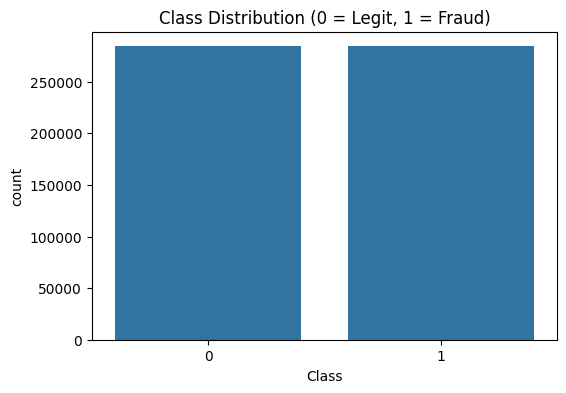

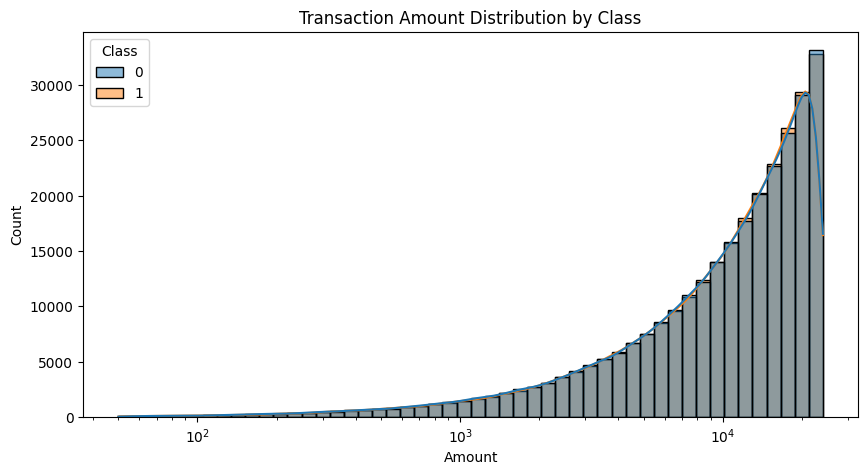

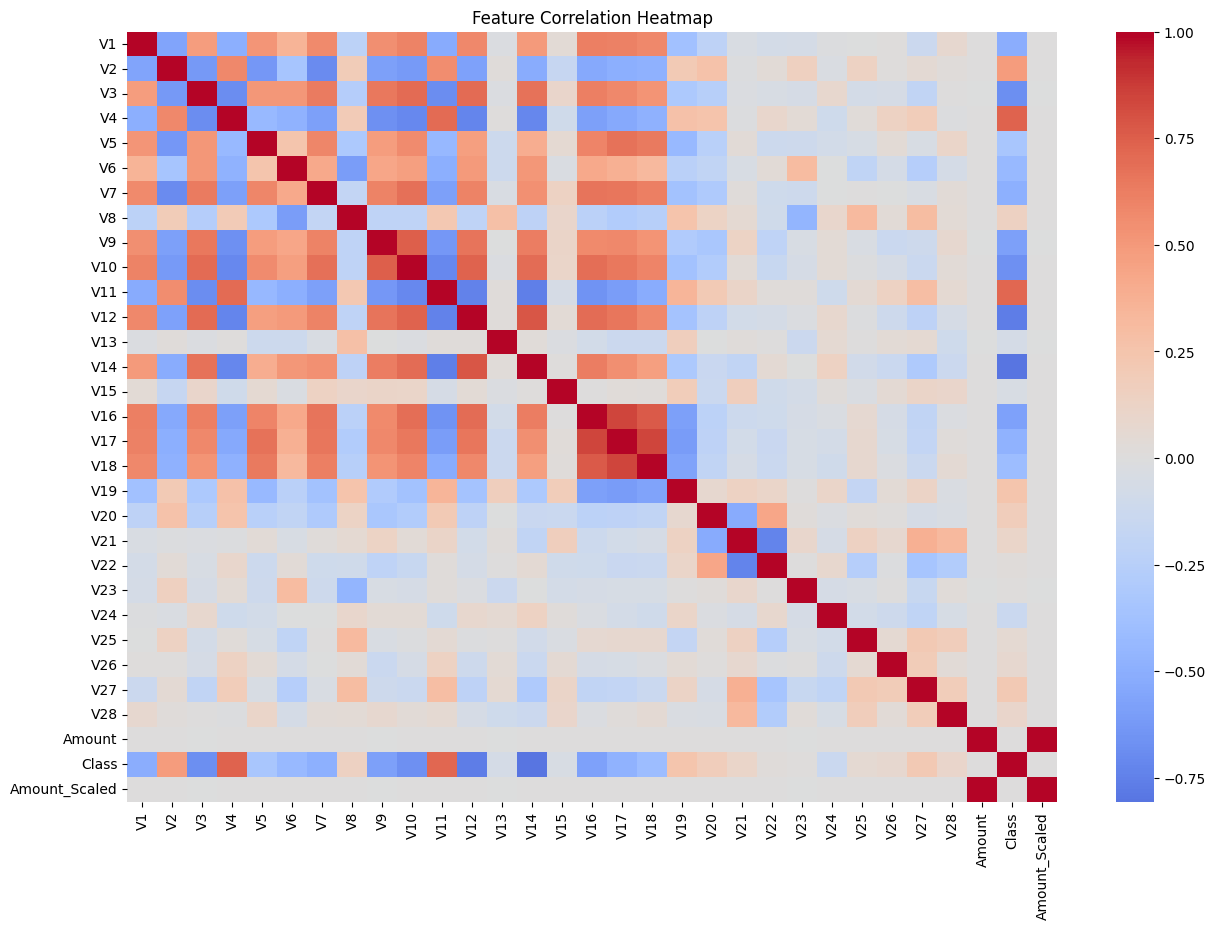

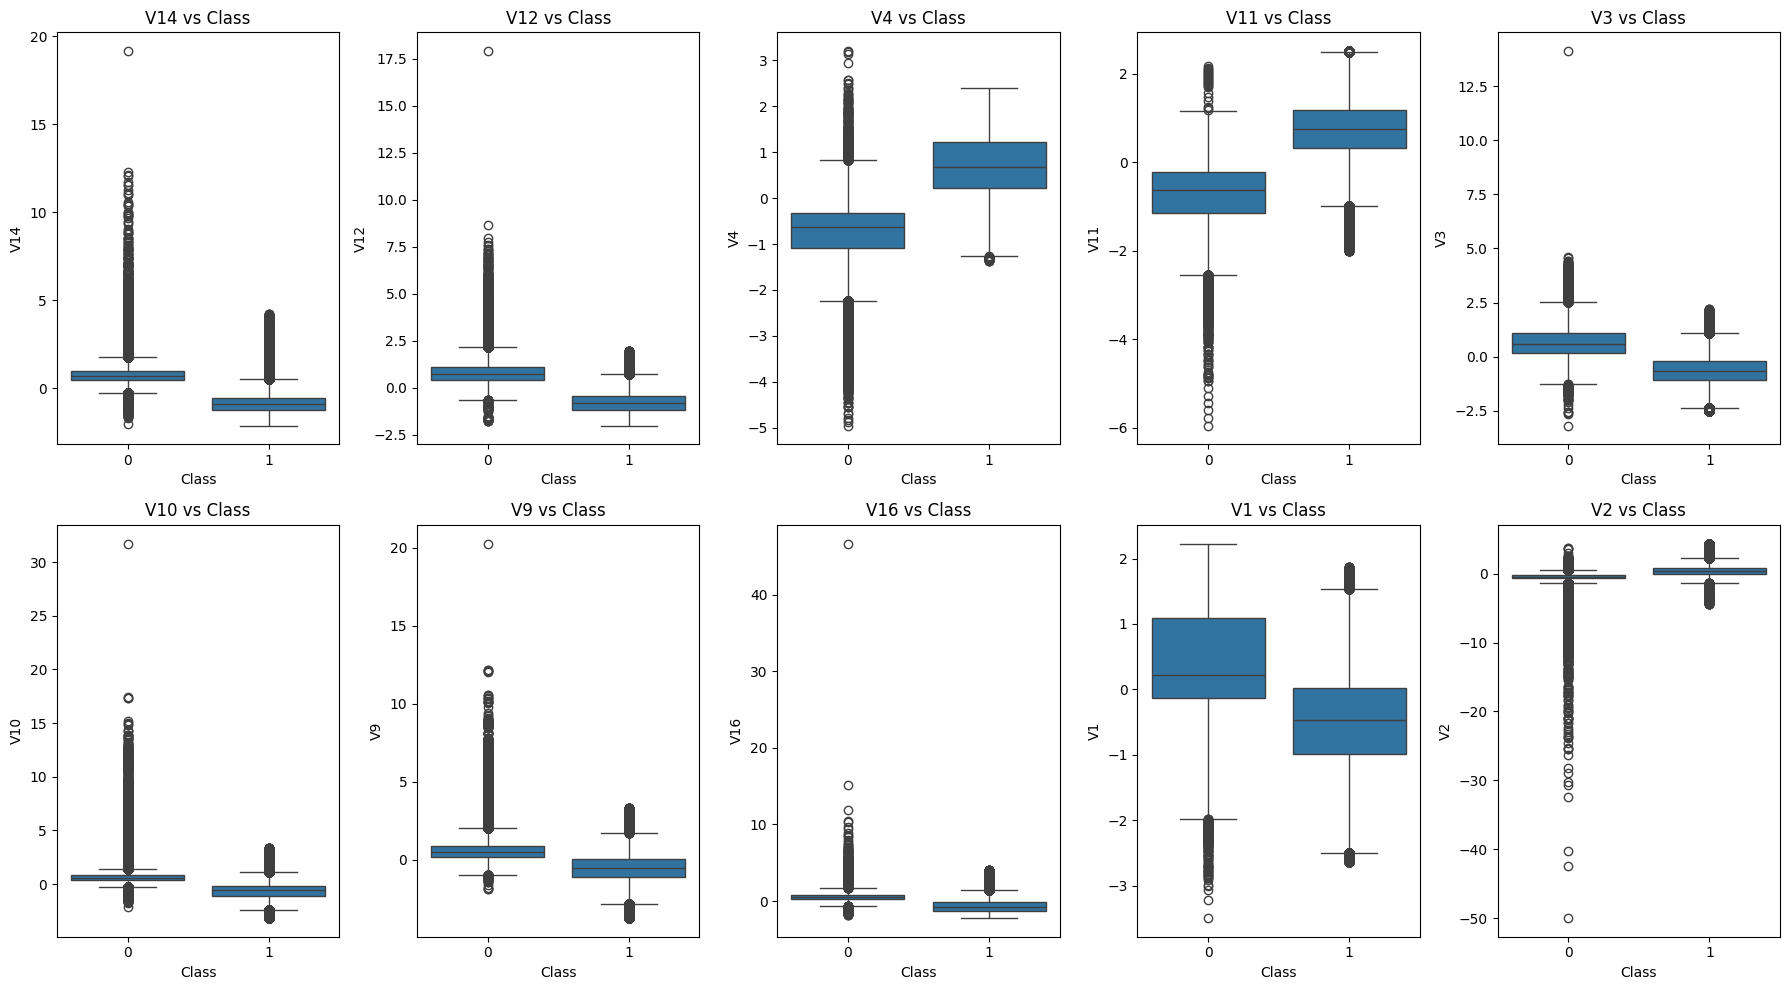

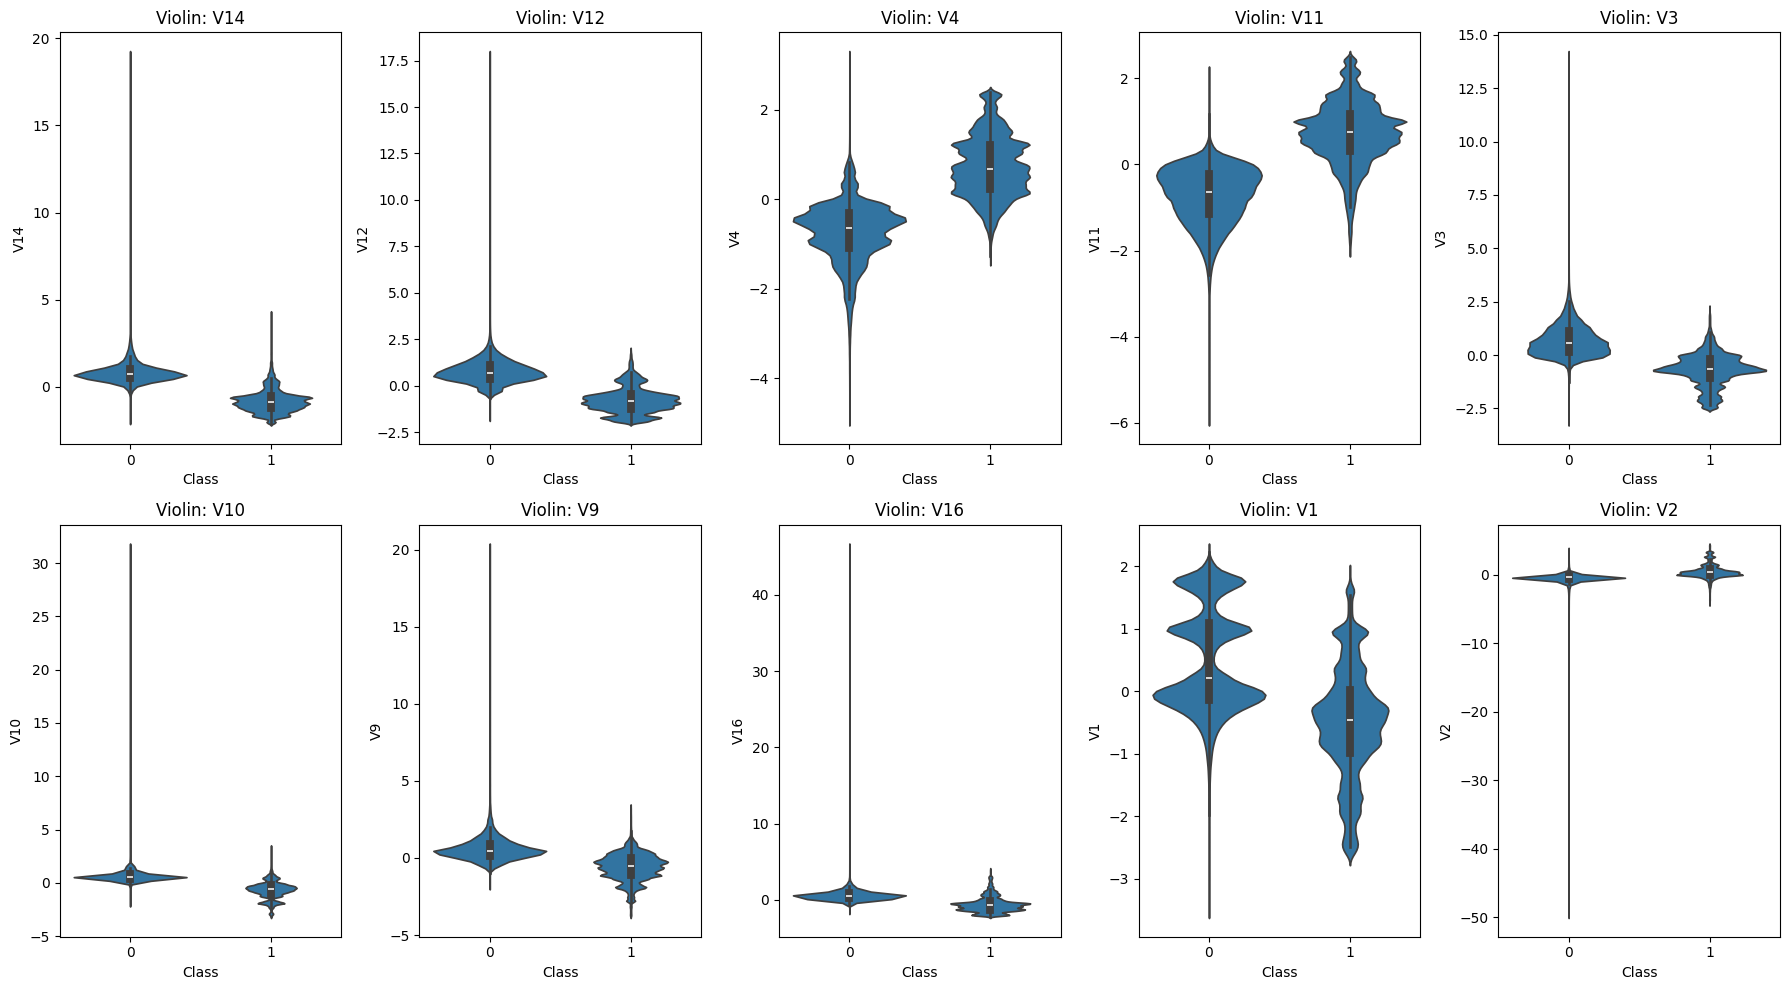

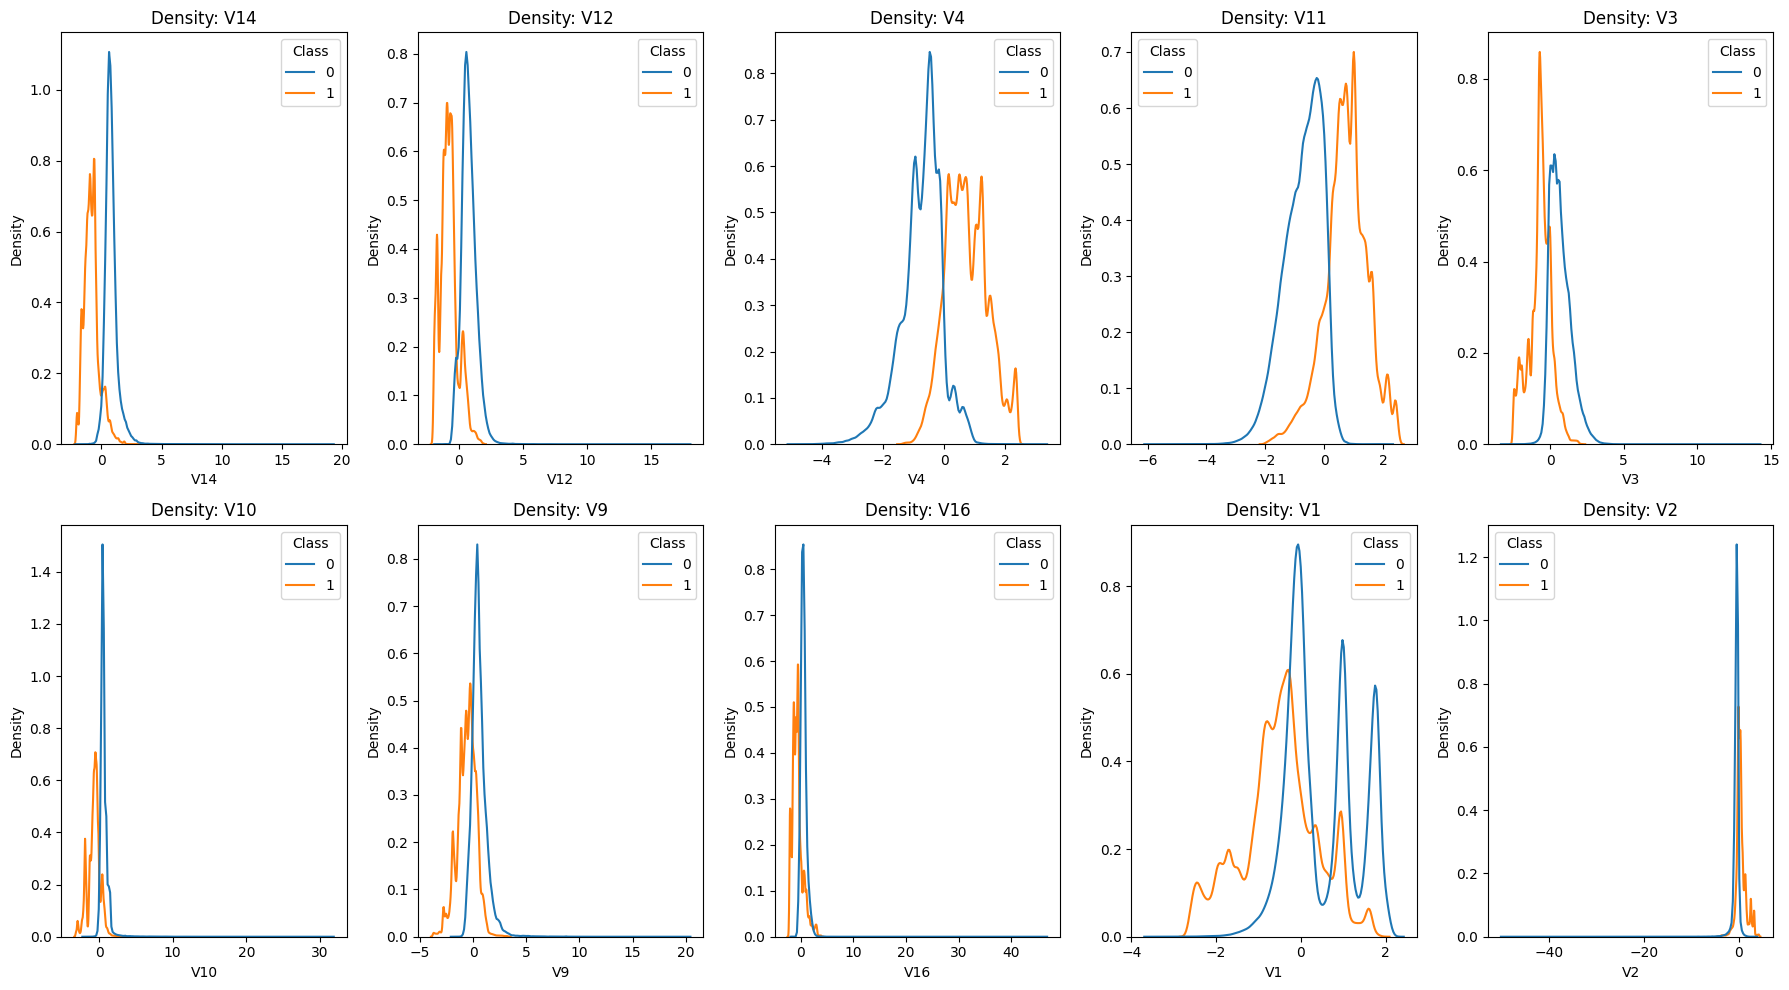

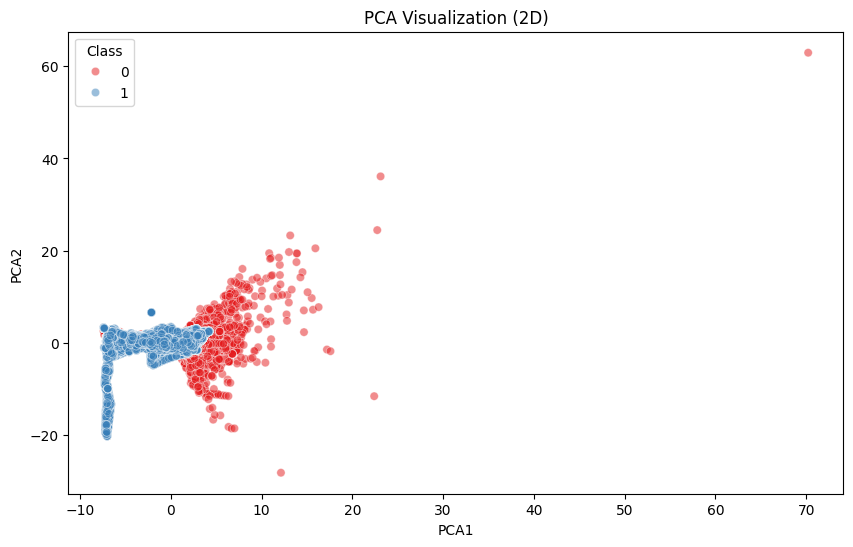


--- Summary Statistics ---
                 V1            V2            V3            V4            V5  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean  -5.638058e-17 -1.319545e-16 -3.518788e-17 -2.879008e-17  7.997245e-18   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -3.495584e+00 -4.996657e+01 -3.183760e+00 -4.951222e+00 -9.952786e+00   
25%   -5.652859e-01 -4.866777e-01 -6.492987e-01 -6.560203e-01 -2.934955e-01   
50%   -9.363846e-02 -1.358939e-01  3.528579e-04 -7.376152e-02  8.108788e-02   
75%    8.326582e-01  3.435552e-01  6.285380e-01  7.070047e-01  4.397368e-01   
max    2.229046e+00  4.361865e+00  1.412583e+01  3.201536e+00  4.271689e+01   

                 V6            V7            V8            V9           V10  \
count  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05  5.686300e+05   
mean  -3.958636e-17 -3.198898e-17  2.109273e-17  3.998623e-17  1.991314e-16   
std    1.000001e+00  1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
df = pd.read_csv("datasets/creditcard_2023.csv")  # Replace with your actual file name

# Drop ID column if present
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

# Standardize Amount column
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

# --------- 1. Class Distribution ---------
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title("Class Distribution (0 = Legit, 1 = Fraud)")
plt.show()

# --------- 2. Transaction Amount Analysis ---------
plt.figure(figsize=(10,5))
sns.histplot(df, x='Amount', hue='Class', log_scale=True, bins=50, kde=True)
plt.title("Transaction Amount Distribution by Class")
plt.show()

# --------- 3. Correlation Matrix Heatmap ---------
plt.figure(figsize=(15, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Feature Correlation Heatmap")
plt.show()

# --------- 4. Top Correlated Features with Class ---------
corr_with_class = corr_matrix['Class'].abs().sort_values(ascending=False)
top_corr_features = corr_with_class[1:11].index  # Exclude 'Class' itself

plt.figure(figsize=(18, 10))
for i, col in enumerate(top_corr_features, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(x='Class', y=col, data=df)
    plt.title(f"{col} vs Class")
plt.tight_layout()
plt.show()

# --------- 5. Violin Plots for Top Features ---------
plt.figure(figsize=(18, 10))
for i, col in enumerate(top_corr_features, 1):
    plt.subplot(2, 5, i)
    sns.violinplot(x='Class', y=col, data=df)
    plt.title(f"Violin: {col}")
plt.tight_layout()
plt.show()

# --------- 6. Density Plots ---------
plt.figure(figsize=(18, 10))
for i, col in enumerate(top_corr_features, 1):
    plt.subplot(2, 5, i)
    sns.kdeplot(data=df, x=col, hue='Class', common_norm=False)
    plt.title(f"Density: {col}")
plt.tight_layout()
plt.show()

# --------- 7. PCA for 2D Visualization ---------
features = [f'V{i}' for i in range(1, 29)] + ['Amount_Scaled']
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', palette='Set1', data=df, alpha=0.5)
plt.title("PCA Visualization (2D)")
plt.show()

# --------- 8. Summary Statistics ---------
print("\n--- Summary Statistics ---")
print(df.describe())

print("\n--- Class Balance ---")
print(df['Class'].value_counts())

print("\n--- Top 10 Correlated Features with Class ---")
print(corr_with_class.head(11))


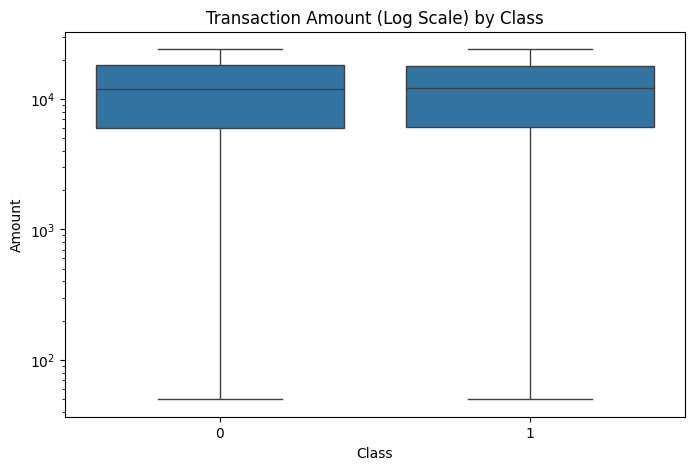

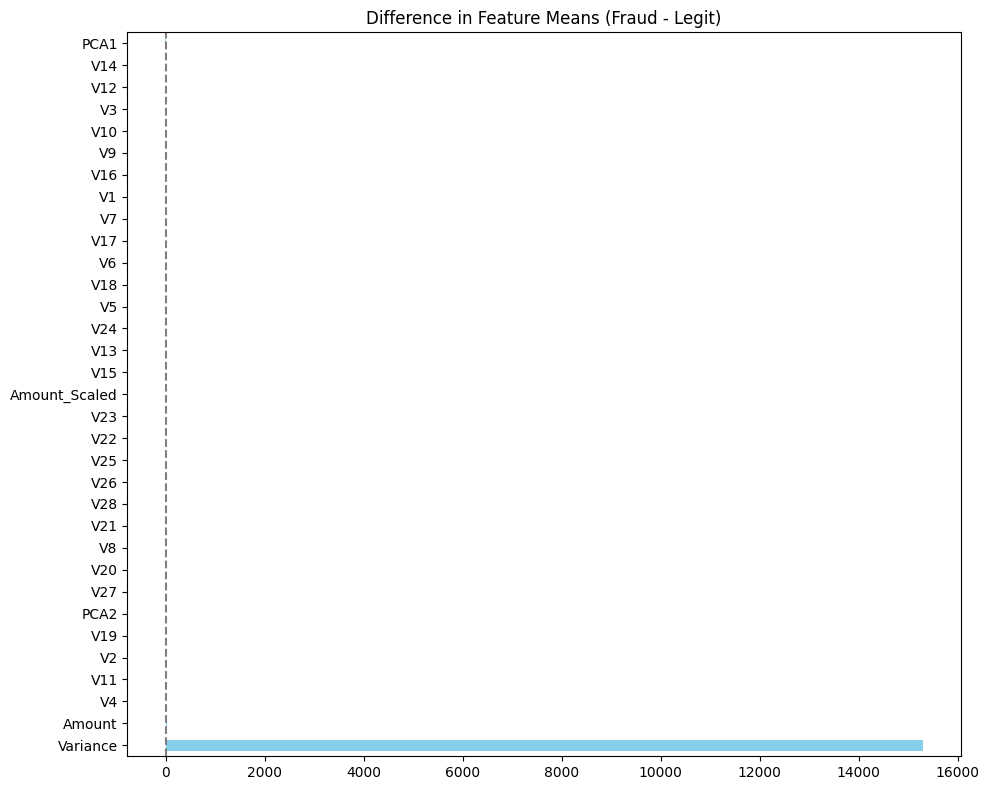

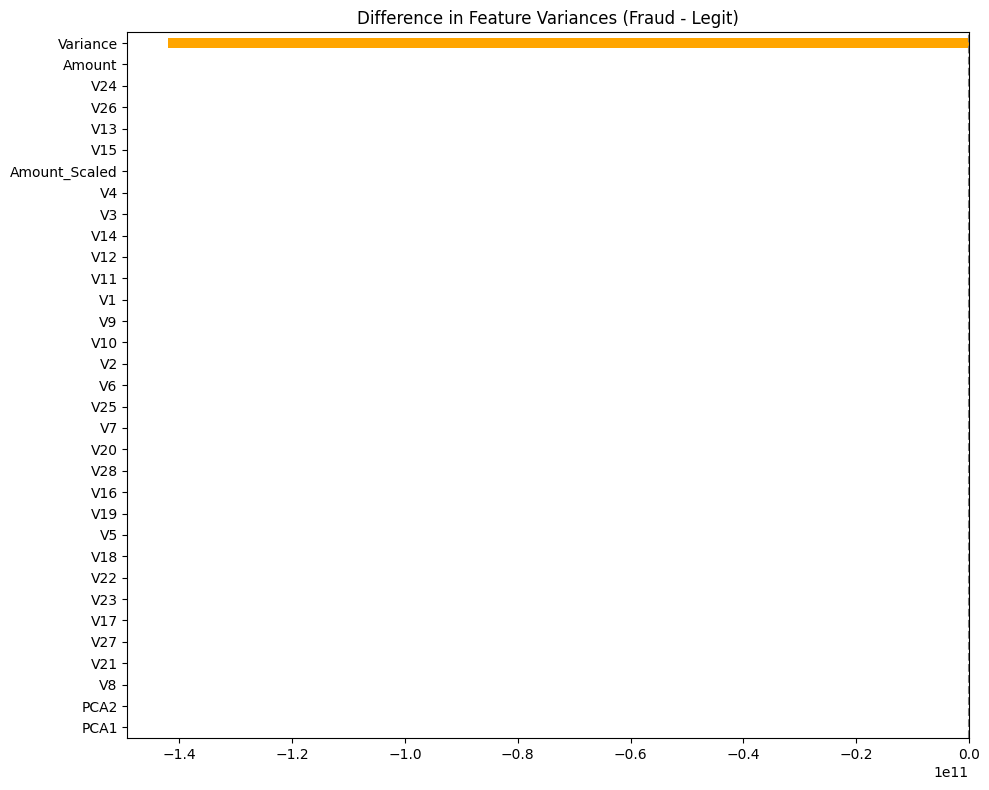

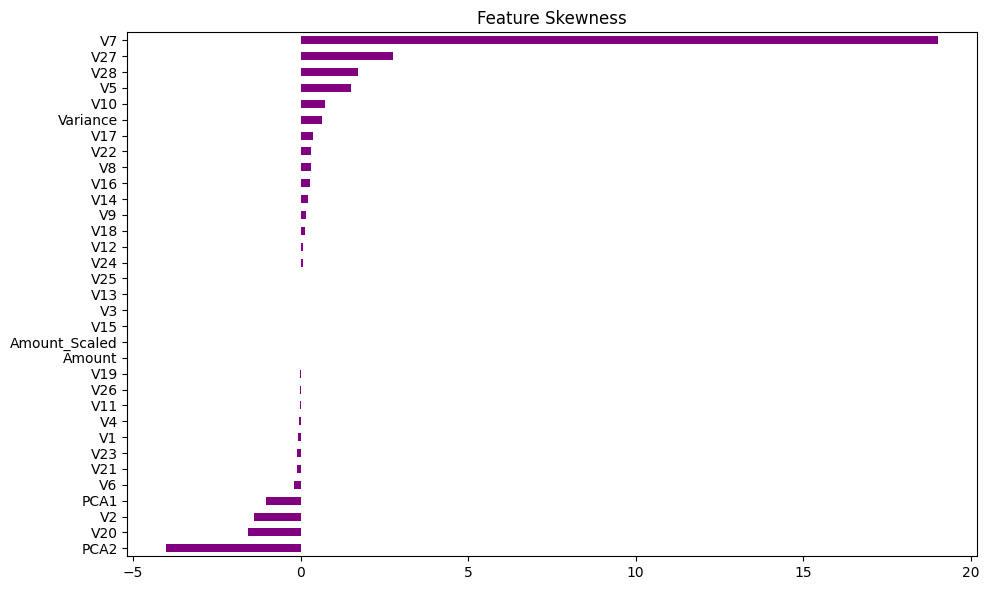

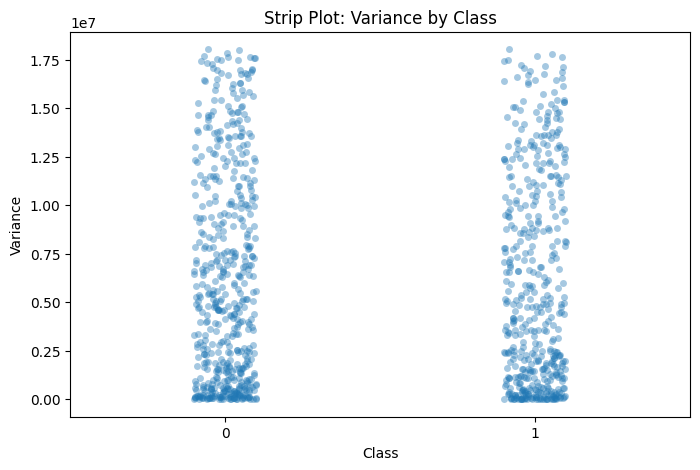

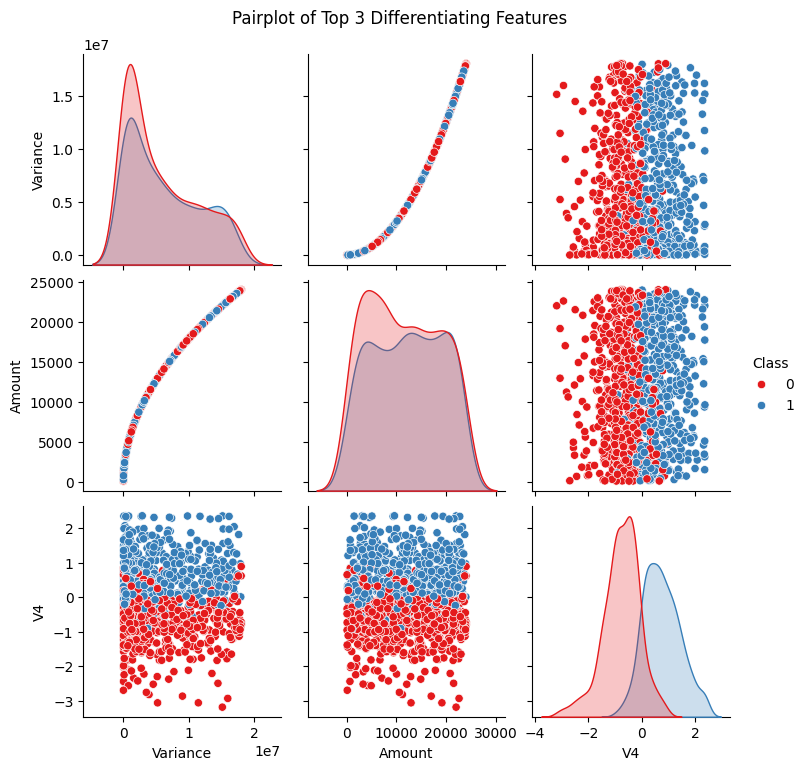

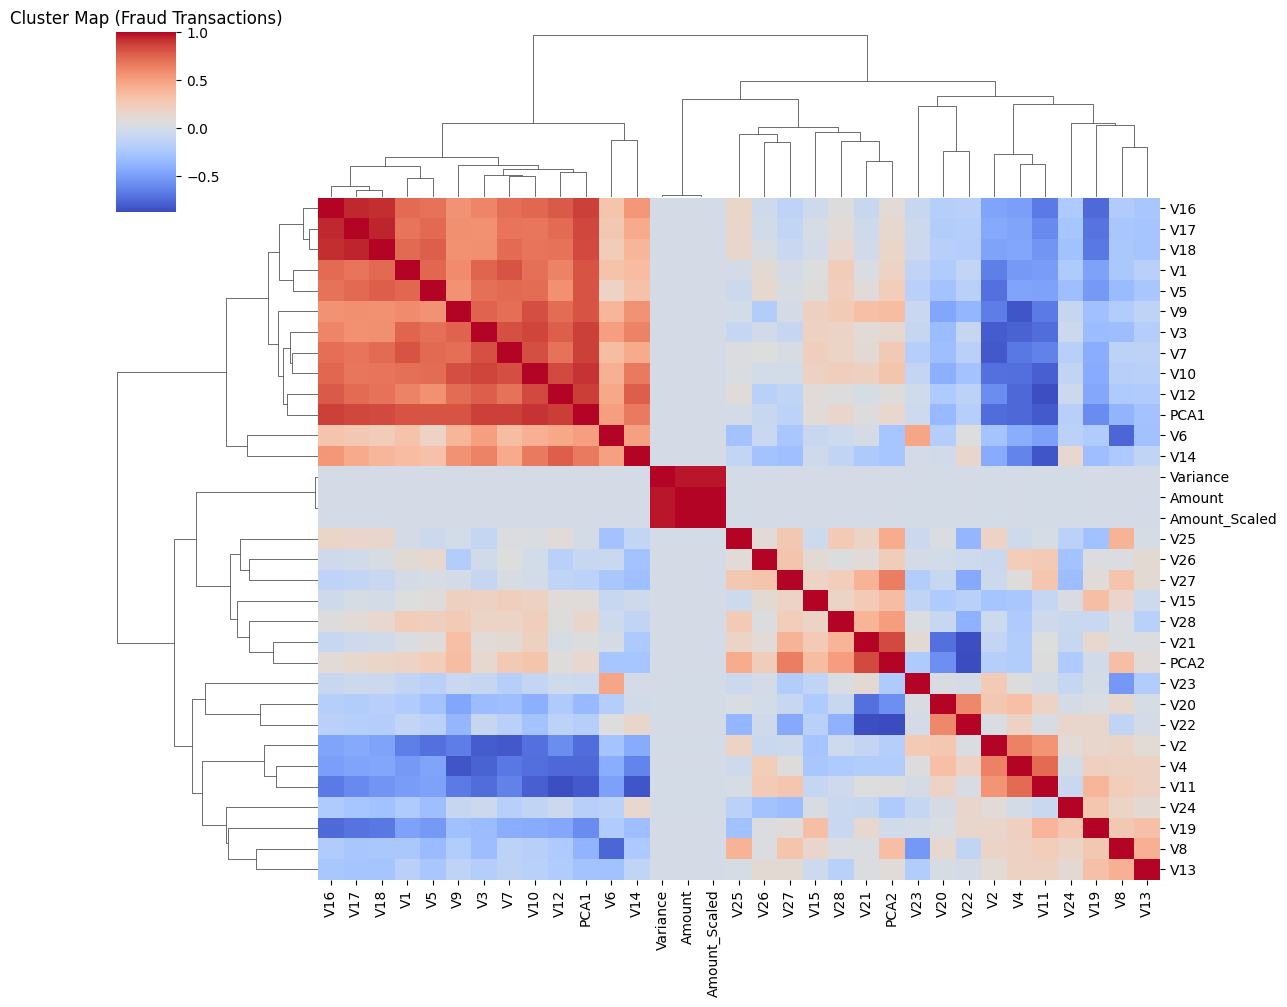

In [2]:
# Scale Amount
scaler = StandardScaler()
df['Amount_Scaled'] = scaler.fit_transform(df[['Amount']])

# Add variance for sorting
df['Variance'] = df.drop(columns=['Class']).var(axis=1)

# --------- 1. Class vs Amount (Log Y) ---------
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.yscale('log')
plt.title("Transaction Amount (Log Scale) by Class")
plt.show()

# --------- 2. Feature Means by Class ---------
mean_diff = df.groupby('Class').mean().T
mean_diff['diff'] = mean_diff[1] - mean_diff[0]
mean_diff_sorted = mean_diff.sort_values(by='diff', ascending=False)

plt.figure(figsize=(10, 8))
mean_diff_sorted['diff'].plot(kind='barh', color='skyblue')
plt.title("Difference in Feature Means (Fraud - Legit)")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# --------- 3. Feature Variance by Class ---------
var_diff = df.groupby('Class').var().T
var_diff['diff'] = var_diff[1] - var_diff[0]
var_diff_sorted = var_diff.sort_values(by='diff', ascending=False)

plt.figure(figsize=(10, 8))
var_diff_sorted['diff'].plot(kind='barh', color='orange')
plt.title("Difference in Feature Variances (Fraud - Legit)")
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

# --------- 4. Distribution Skewness by Class ---------
from scipy.stats import skew

skews = df.drop(columns=['Class']).apply(skew).sort_values()
plt.figure(figsize=(10, 6))
skews.plot(kind='barh', color='purple')
plt.title("Feature Skewness")
plt.tight_layout()
plt.show()

# --------- 5. Strip plot of highly separated feature ---------
top_feature = mean_diff_sorted.index[0]
plt.figure(figsize=(8, 5))
sns.stripplot(x='Class', y=top_feature, data=df.sample(1000), jitter=True, alpha=0.4)
plt.title(f"Strip Plot: {top_feature} by Class")
plt.show()

# --------- 6. Pairplot of top 3 features ---------
from itertools import combinations

top3 = mean_diff_sorted.index[:3].tolist()
sns.pairplot(df.sample(1000), vars=top3, hue='Class', palette='Set1')
plt.suptitle("Pairplot of Top 3 Differentiating Features", y=1.02)
plt.show()

# --------- 7. Clustermap (Fraud-only) ---------
fraud = df[df['Class'] == 1].drop(columns=['Class'])
sns.clustermap(fraud.corr(), cmap="coolwarm", figsize=(12, 10))
plt.title("Cluster Map (Fraud Transactions)")
plt.show()
